In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt
from datetime import datetime
import sys
import copy
import time
from itertools import chain

In [ ]:
class Graph(object):

    def __init__(self, graph_dict=None):
        """ initializes a graph object 
            If no dictionary or None is given, 
            an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self.__graph_dict = graph_dict

    def vertices(self):
        """ returns the vertices of a graph """
        return list(self.__graph_dict.keys())

    def edges(self):
        """ returns the edges of a graph """
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ If the vertex "vertex" is not in 
            self.__graph_dict, a key "vertex" with an empty
            list as a value is added to the dictionary. 
            Otherwise nothing has to be done. 
        """
        if vertex not in self.__graph_dict:
            self.__graph_dict[vertex] = []

    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two vertices can be multiple edges! 
        """
        edge = set(edge)
        (vertex1, vertex2) = tuple(edge)
        if vertex1 in self.__graph_dict:
            self.__graph_dict[vertex1].append(vertex2)
        else:
            self.__graph_dict[vertex1] = [vertex2]

    def __generate_edges(self):
        """ A static method generating the edges of the 
            graph "graph". Edges are represented as sets 
            with one (a loop back to the vertex) or two 
            vertices 
        """
        edges = []
        for vertex in self.__graph_dict:
            for neighbour in self.__graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges

    def find_all_paths(self, start_vertex, end_vertex, path=[]):
            """ find all paths from start_vertex to 
                end_vertex in graph """
            graph = self.__graph_dict 
            path = path + [start_vertex]
            if start_vertex == end_vertex:
                return [path]
            if start_vertex not in graph:
                return []
            paths = []
            for vertex in graph[start_vertex]:
                if vertex not in path:
                    extended_paths = self.find_all_paths(vertex, 
                                                        end_vertex, 
                                                        path)
                    for p in extended_paths: 
                        paths.append(p)
            return paths
    def vertex_degree(self, vertex):
        """ The degree of a vertex is the number of edges connecting
            it, i.e. the number of adjacent vertices. Loops are counted 
            double, i.e. every occurence of vertex in the list 
            of adjacent vertices. """ 
        adj_vertices =  self.__graph_dict[vertex]
        degree = len(adj_vertices) + adj_vertices.count(vertex)
        return degree

    def find_isolated_vertices(self):
        """ returns a list of isolated vertices. """
        graph = self.__graph_dict
        isolated = []
        for vertex in graph:
            print(isolated, vertex)
            if not graph[vertex]:
                isolated += [vertex]
        return isolated

    def delta(self):
        """ the minimum degree of the vertices """
        min = 100000000
        for vertex in self.__graph_dict:
            vertex_degree = self.vertex_degree(vertex)
            if vertex_degree < min:
                min = vertex_degree
        return min
        
    def Delta(self):
        """ the maximum degree of the vertices """
        max = 0
        for vertex in self.__graph_dict:
            vertex_degree = self.vertex_degree(vertex)
            if vertex_degree > max:
                max = vertex_degree
        return max

    def density(self):
        """ method to calculate the density of a graph """
        g = self.__graph_dict
        V = len(g.keys())
        E = len(self.edges())
        return 2.0 * E / (V *(V - 1))

    def is_connected(self, 
                     vertices_encountered = None, 
                     start_vertex=None):
        """ determines if the graph is connected """
        if vertices_encountered is None:
            vertices_encountered = set()
        gdict = self.__graph_dict        
        vertices = list(gdict.keys()) # "list" necessary in Python 3 
        if not start_vertex:
            # chosse a vertex from graph as a starting point
            start_vertex = vertices[0]
        vertices_encountered.add(start_vertex)
        if len(vertices_encountered) != len(vertices):
            for vertex in gdict[start_vertex]:
                if vertex not in vertices_encountered:
                    if self.is_connected(vertices_encountered, vertex):
                        return True
        else:
            return True
        return False 

    def diameter(self):
        """ calculates the diameter of the graph """
        
        v = self.vertices() 
        pairs = [ (v[i],v[j]) for i in range(len(v)-1) for j in range(i+1, len(v))]
        smallest_paths = []
        for (s,e) in pairs:
            paths = self.find_all_paths(s,e)
            smallest = sorted(paths, key=len)[0]
            smallest_paths.append(smallest)

        smallest_paths.sort(key=len)

        # longest path is at the end of list, 
        # i.e. diameter corresponds to the length of this path
        diameter = len(smallest_paths[-1]) - 1
        return diameter
    
    def __str__(self):
        res = "vertices: "
        for k in self.__graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res

In [ ]:
matrix = [
            [0, 10, 11, 12, 13, 14],
            [10, 0, 15, 16, 17, 18],
            [11, 15, 0, 19, 20, 21],
            [12, 16, 19, 0, 22, 23],
            [13, 17, 20, 22, 0, 24],
            [14, 18, 21, 23, 24, 0]          
]
nodes = [1, 2, 3, 4, 5, 6]
n = len(nodes)
weights = list(chain.from_iterable(matrix))
# Create a graph 
gr = nx.Graph()
for n in nodes:
  gr.add_node(n) 
#sort edges
# Relative sorted order in Matrix 
# using list comprehension + enumerate() + sort() + lambda 
res = [(i+1, j+1) for i, x in enumerate(matrix) for j, _ in enumerate(x)]
#-----------------------------------------------------------------
start_time = datetime.now()
degree = [0 for i in range(n)]
chosen_edges =[]
g = dict(zip(res, weights))
g=dict(sorted(g.items(), key=lambda item: item[1]))
#sort g
sorted_values = sorted(g.values()) # Sort the values
gx = {}
for i in sorted_values:
    for k in g.keys():
        if g[k] == i:
            gx[k] = g[k]
            break
del gx[(1,1)]
key_list = list(gx.keys())
#print("!!!",key_list)
val_list = list(gx.values())
#print("VVV",val_list)
cost = 0
for k in key_list:
   if ((degree[k[0]-1] < 2) and (degree[k[1]-1] < 2)):
      gr.add_edge(k[0]+1,k[1]+1)
      if ((nx.cycle_basis(gr,k[0]+1)) and (len(chosen_edges) != n-1)):
        gr.remove_edge(k[0]+1,k[1]+1)
      else:
        
        cost =cost + val_list[key_list.index(k)]
        chosen_edges.append(k)
        degree[k[0]-1]=degree[k[0]-1]+ 1
        degree[k[1]-1]=degree[k[1]-1]+ 1  
end_time = datetime.now()
print("les aretes choisie :",chosen_edges)
print("le cout :",cost)



les aretes choisie : [(1, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 6)]
le cout : 104


In [ ]:
print("Starting city: '1'")
path = []
visited = False
path.append(1)
while(len(path) < n+1):
  for i in chosen_edges:
    k = len(path)
    if (i[0] == path[k-1])  : 
      path.append(i[1]) 
    elif (i[1] == path[k-1])  : 
      path.append(i[0])
     
path 


Starting city: '1'


[1, 2, 4, 6, 5, 3, 1]

Starting city: '1'
Path : [1, 2, 4, 6, 5, 3, 1]
Cost: 104
Duration: 0:00:00.000795


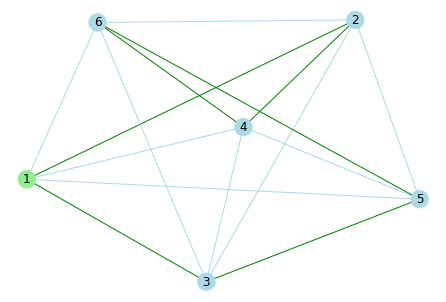

In [ ]:
G = nx.Graph()
for n in nodes:
  G.add_node(n)
  for e in nodes:
    if (e != n):
      G.add_edge(n,e)

graph = Graph(nodes)
color_map = []   
find = True
for n in G.edges:
  for i in range(len(path)-1):
    if (n == (path[i],path[i+1]) or n ==(path[i+1],path[i])) and find == True: 
      color_map.append('green') 
      find = False  
       
  if find == True: enter:color_map.append('lightblue')    
  find = True
color_map2 = []
for node in G.nodes:
    if node == path[0]:
        color_map2.append('lightgreen')
    else: color_map2.append('lightblue')
nx.draw(G,with_labels=1,edge_color=color_map,node_color=color_map2)
print("Starting city: '1'")
print("Path :",path)
print("Cost:",cost)
print('Duration: {}'.format(end_time - start_time))